#### Time Series Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
plt.rcParams['figure.figsize'] = [8,3]
plt.rcParams['figure.dpi'] = 150

In [18]:
df = pd.read_csv("Data/daily-temperature.csv")
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [20]:
# Changing Date Type from object too time date
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [21]:
df.set_index('Date', inplace=True)

#### Time Series Scatter Plot 

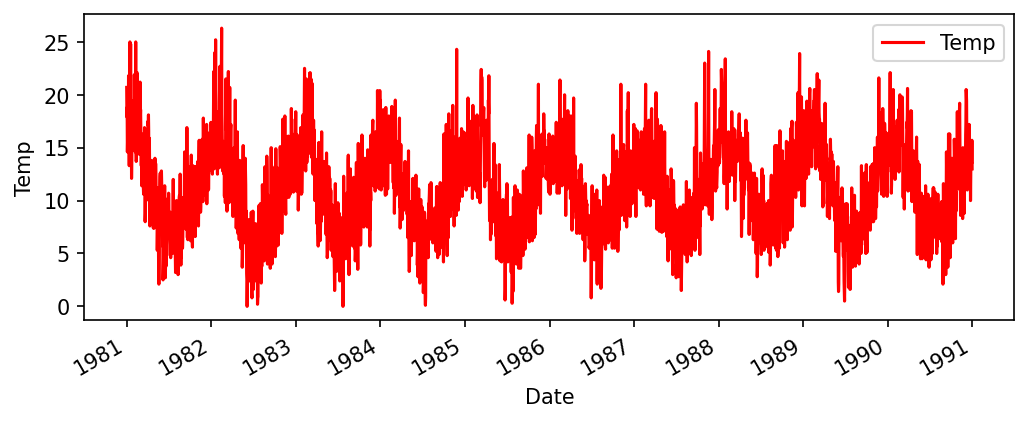

In [46]:
df.plot(color='r')
plt.ylabel("Temp")
plt.show()

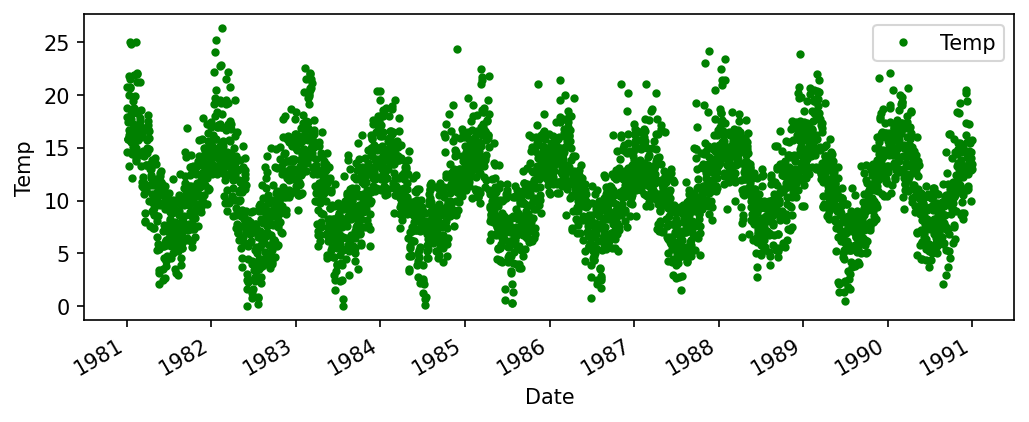

In [45]:
df.plot(style= '.', color='g')
plt.ylabel("Temp")
plt.show()

#### Subplots

In [48]:
groups = df.groupby(pd.Grouper(freq='A'))

In [51]:
keys = groups.groups
keys

{Timestamp('1981-12-31 00:00:00', freq='A-DEC'): 365,
 Timestamp('1982-12-31 00:00:00', freq='A-DEC'): 730,
 Timestamp('1983-12-31 00:00:00', freq='A-DEC'): 1095,
 Timestamp('1984-12-31 00:00:00', freq='A-DEC'): 1460,
 Timestamp('1985-12-31 00:00:00', freq='A-DEC'): 1825,
 Timestamp('1986-12-31 00:00:00', freq='A-DEC'): 2190,
 Timestamp('1987-12-31 00:00:00', freq='A-DEC'): 2555,
 Timestamp('1988-12-31 00:00:00', freq='A-DEC'): 2920,
 Timestamp('1989-12-31 00:00:00', freq='A-DEC'): 3285,
 Timestamp('1990-12-31 00:00:00', freq='A-DEC'): 3650}

In [52]:
groups.get_group("1981-12-31")

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1981-12-27,15.5
1981-12-28,13.3
1981-12-29,15.6


In [56]:
years = pd.DataFrame()
for key in keys:
    years[key] = groups.get_group(key)['Temp'].values

In [57]:
years

,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


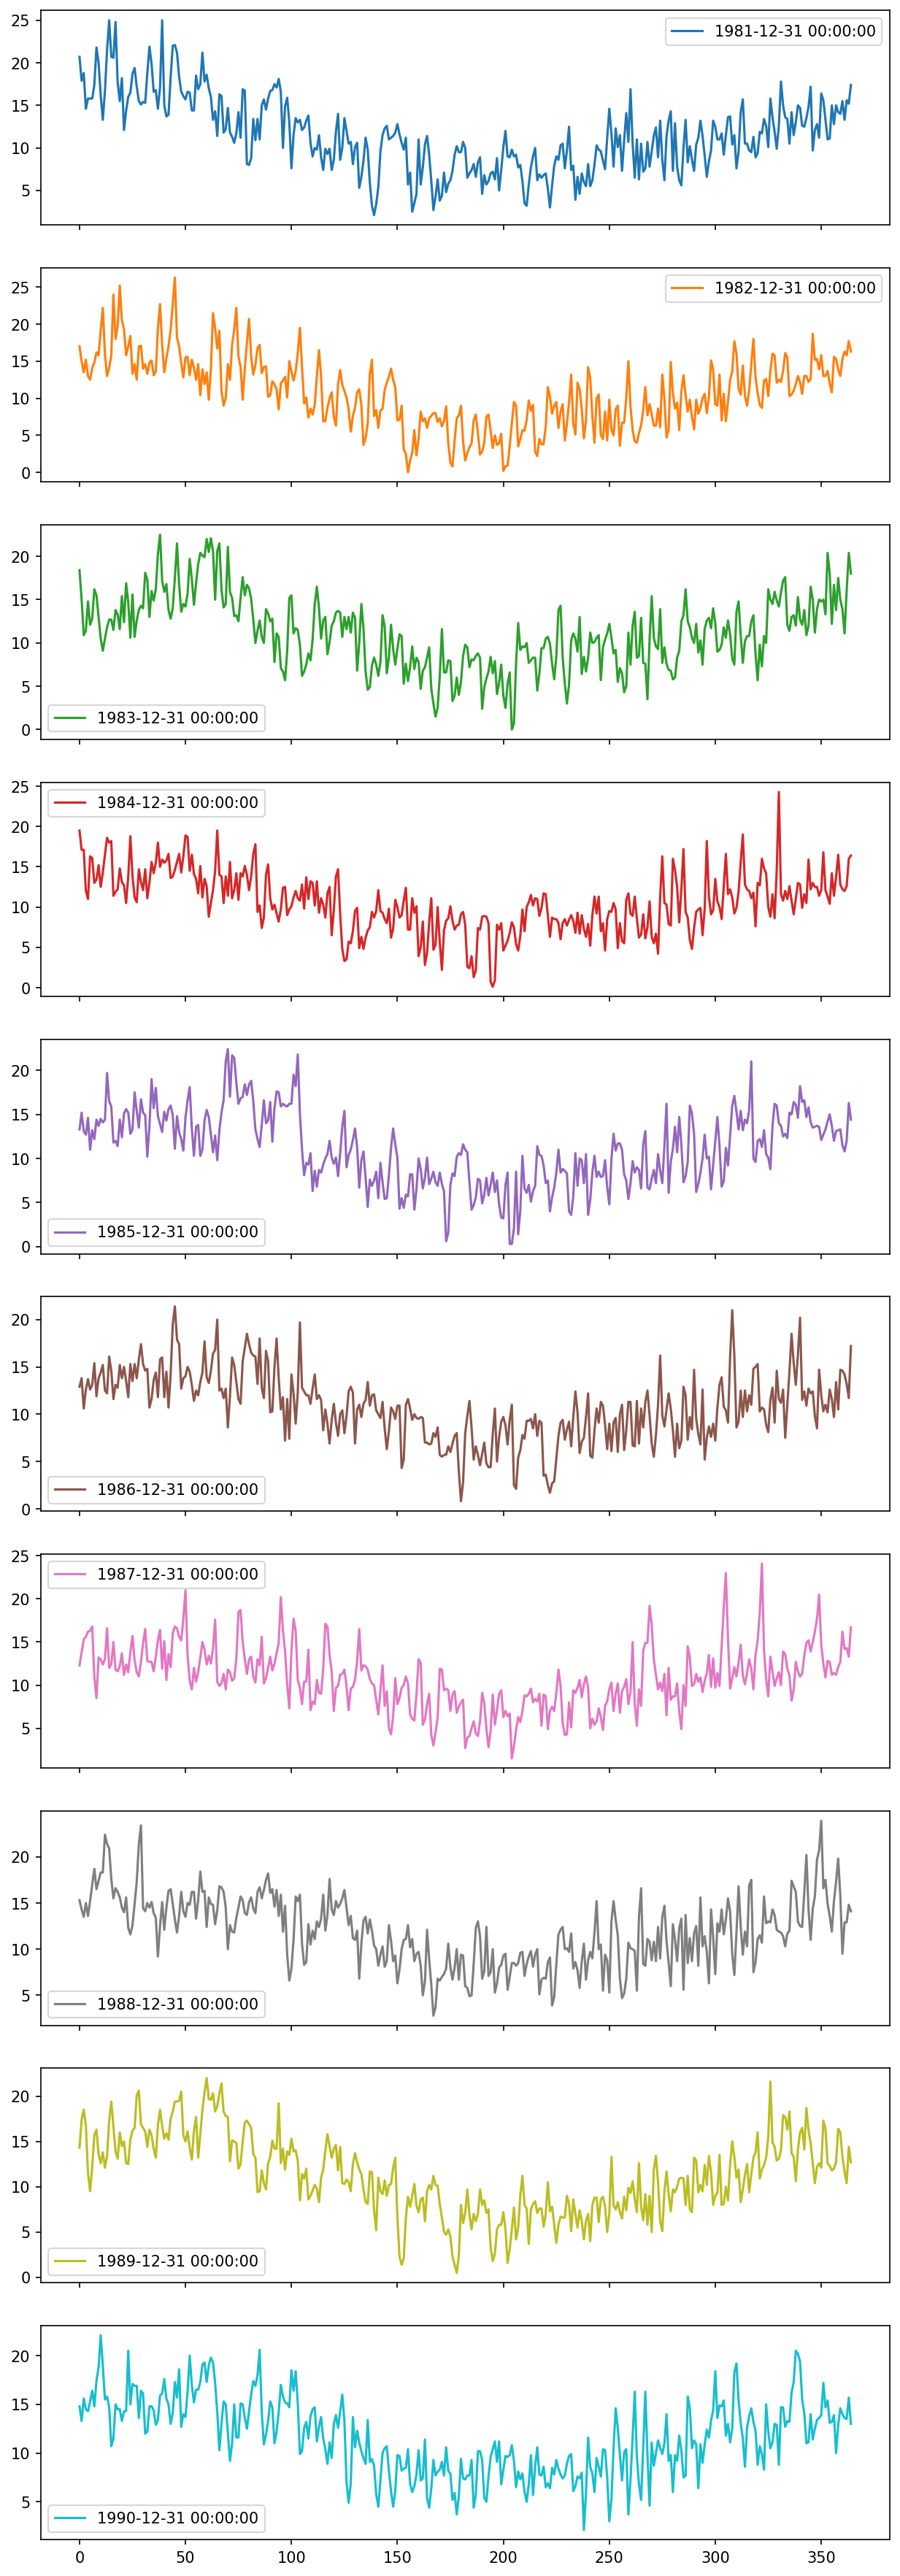

In [60]:
years.plot(subplots=True, figsize=(10, 30))
plt.show()

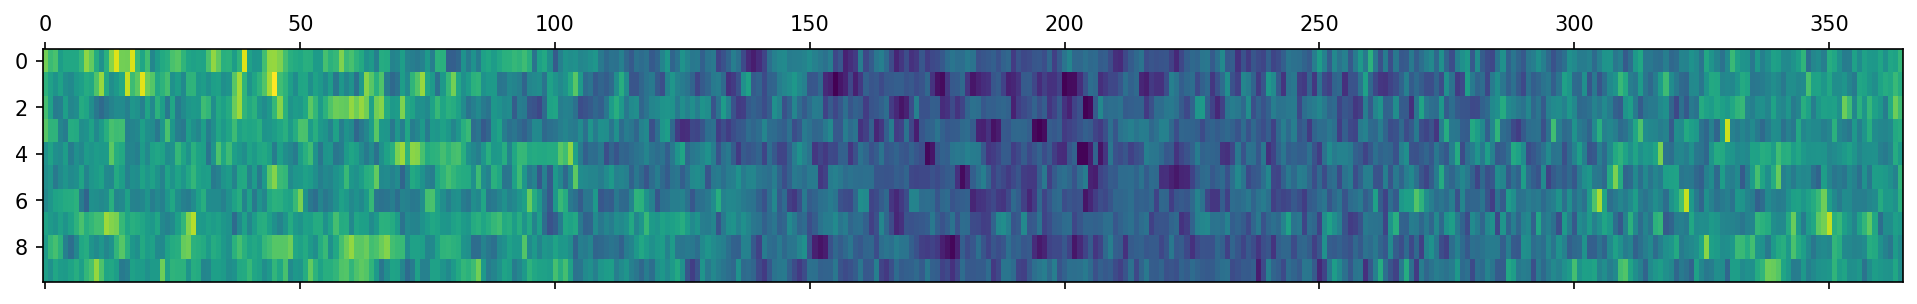

In [62]:
plt.matshow(years.T, aspect = 'auto')